In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import TempCompleteFunctions as tpc

In [3]:
%matplotlib qt

In [4]:
%matplotlib inline

In [21]:
def normalizeVector(vectorArray):
    '''Calculate the normalized vectors of R3 vectors in an array of n vectors'''
    
    if vectorArray.shape[0] == (3,): #Check if the passed in array is a single vector
        r = np.sqrt(np.sum(vectorArray[:]**2)) #Vector lengths
        return(vectorArray/np.transpose([r])) #Return the array of normalized vectors
            
    r = np.sqrt(np.sum(vectorArray[:]**2,axis=1)) #Vector lengths
    return(vectorArray/np.transpose([r])) #Return the array of normalized vectors

# def eulerAngle(vectorArray):
#     '''Calculate the euler angle between adjacent vectors in an array of n vectors'''
    
def genNormalizedRotationVector(vectorArray):
    '''Calculate and generate the rotation vectors between each adjacent vector in an array of n vectors'''
    
    for i in range(len(vectorArray)-1):
        if i == 0: #Create the rotation axis array with the first element only
            rotAxisArray = np.cross(vectorArray[i],vectorArray[i+1])
            
        else: #Create the remaining elements of the rotation axis array
            rotAxisArray = np.vstack((rotAxisArray,np.cross(vectorArray[i],vectorArray[i+1])))

    return(normalizeVector(rotAxisArray))

def genNormalizedRotationVectorSep(xPoints, yPoints, zPoints):
    '''
    Calculate and generate the rotation vectors between each adjacent vector in an array of n vectors
    
    xPoints: array of points that define x coordinates and combine to form an array of row vectors
    yPoints: array of points that define y coordinates and combine to form an array of row vectors
    zPoints: array of points that define z coordinates and combine to form an array of row vectors
    '''
    
    vectorArray = np.array([xPoints,yPoints,zPoints]).transpose() #Combine the x,y,z points into a single array to simplify math
    
    for i in range(len(vectorArray)-1):
        if i == 0: #Create the rotation axis array with the first element only
            rotAxisArray = np.cross(vectorArray[i],vectorArray[i+1])
            
        else: #Create the remaining elements of the rotation axis array
            rotAxisArray = np.vstack((rotAxisArray,np.cross(vectorArray[i],vectorArray[i+1])))

    return(normalizeVector(rotAxisArray))


findEulerAngle = lambda a,b: np.arccos(a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)))

(-1.0, 1.0)

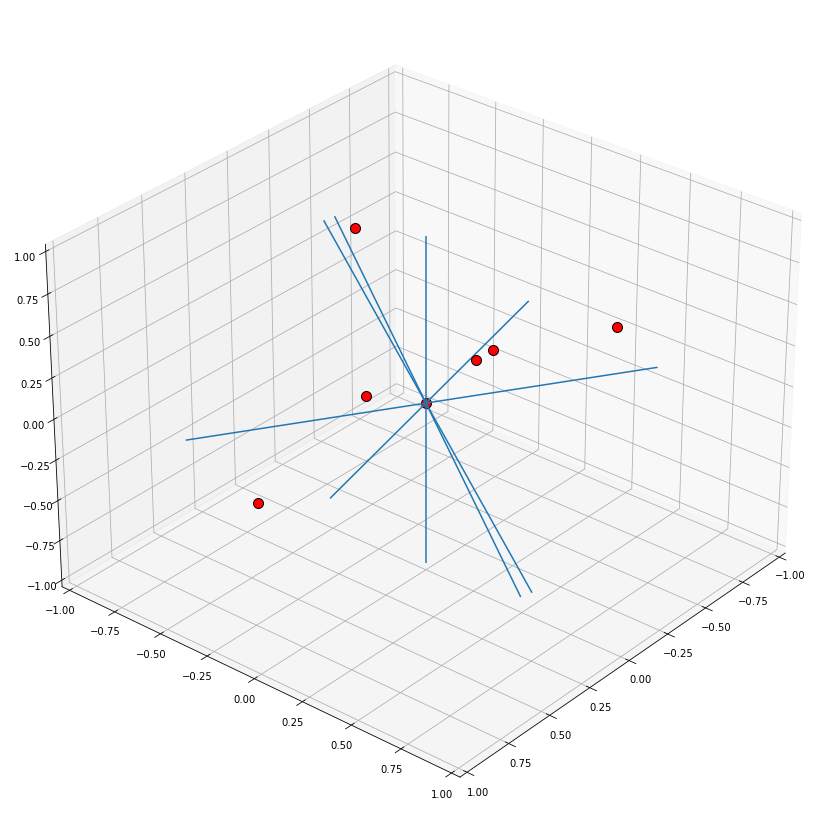

In [22]:
o1 = np.array([0,0,0])
p1 = np.array([2,3,4])
p2 = np.array([7,3,6])
p3 = np.array([3,6,8])
p6 = np.array([-3,-5,3])
p4 = np.array([1,0,0])
p5 = np.array([-1,0.2,0])

pointArray = np.array([p1,p2,p3,p6,p4,p5])

pointArrayNormalized = normalizeVector(pointArray)

xSet = pointArrayNormalized[:,0]
ySet = pointArrayNormalized[:,1]
zSet = pointArrayNormalized[:,2]

rotAxis = genNormalizedRotationVectorSep(xSet,ySet,zSet)
line_segments = Line3DCollection(np.stack((rotAxis,-1*rotAxis),axis=1))

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(0,0,0,s=100, c = 'red', edgecolors = 'black')
ax.scatter(xSet, ySet, zSet, s=100, c = 'red', edgecolors = 'black', depthshade = False)
ax.add_collection3d(line_segments)
# ax.plot3D(pointArrayNormalized[:,0],pointArrayNormalized[:,1],pointArrayNormalized[:,2],c='green')

ax.view_init(azim=40)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [59]:
# rotAxis = genNormalizedRotationVector(pointArray)

# # print(rotAxis,'\n')
# # print(-1*rotAxis,'\n')

# print(np.stack((rotAxis,-1*rotAxis),axis=1),'\n') #'Zips' rotAxis with -1*rotAxis

# # print(np.stack((rotAxis,-1*rotAxis),axis=1)[:,:,0:2],'\n') #Takes the x and y information
# # print(np.stack((rotAxis,-1*rotAxis),axis=1)[:,:,2:3],'\n') #Takes the z information

# # print(np.stack((rotAxis,-1*rotAxis),axis=1)[:,0],'\n') #Reproduces just positive values

# # line_segment_XY = np.stack((rotAxis,-1*rotAxis),axis=1)[:,:,0:2] #Takes the x and y information
# # line_segment_Z = np.stack((rotAxis,-1*rotAxis),axis=1)[:,:,2:3] #Takes the z information

# line_segments = Line3DCollection(np.stack((rotAxis,-1*rotAxis),axis=1))